<a href="https://colab.research.google.com/github/GauravJoshi13/linear-regression/blob/main/linear-regression/Linear_Regression_gradient_decent_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

Today we're going to learn about linear regression, which, by looking at examples, uses a line or hyperplane to model the universal relationship between several inputs and (potentially) several outputs. Don't worry if that sounds a little intimidating; we're going to break down what that means and go through the process of using linear regression one step at a time. But first . . .


## **Let's talk math!**

Why are we going over math?


*   Machine learning is largely based on math: calculus, statistics, and probability.
*   Thus, having a solid background in these concepts is very helpful!

For today's math concept overview, let's start by talking about . . . 


## **Derivatives and gradient descent**

Derivatives are a way to describe a function's **rate of change.**

Taking the derivative of a function results in another function, which can then be evaluated at a certain value to calculate the rate of change at that point in the function:

>$f(x) = (x-1)^2$

>$\frac{\delta f}{\delta x} = f'(x) = 2(x - 1) = 2x - 2 $

![alt text](https://eli.thegreenplace.net/images/2016/plot-parabola-with-tangents.png)

**Gradient descent** is an algorithm for getting to the bottom, or minimum, of a convex function. 

A function is convex if the line segment between any two points on the graph of the function lies above or on the graph. Therefore, $x^2$ is convex. It has a minimum at $x_{min} = 1$.

Now, let's discuss gradient descent at a high level, using skiing down a hill as an analogy!

Let's consider $f(x) = x^2$. We know that $\frac{\delta f}{\delta x} = 2x$, and that $f(x)$ has $x_{min} = 0$. Remember, gradient descent is all about getting to a minimum! You want to get low :)

It seems that you should use $f'(x)$ as a pair of skis to ski down the slope of $f(x)$. Obviously, if you're skiing down a steeper part of $f(x)$, then you would move faster.

**Gradient descent:**

```while``` $x_{n+1} \neq x_n$ ```:```

> $x_{n+1} = x_n - \alpha * \frac{\delta f}{\delta x}|_{x=x_n}$

I know, this formula looks scary. Don't worry, we're going to take a second now (actually, more like a minute) to discuss the notation.

1. $\alpha$ is called a hyperparameter and YOU set its value. It controls how fast you ski down $f(x)$, that is, the larger $\alpha$, the more ground you cover. But, be careful! If $\alpha$ is set too high, you might fly off the function.
2. $\lim_{n \to \infty} x_n = x_{min}$


>Let's see if gradient descent does what we want, using $f(x)$ as a test! We can first set $\alpha$ to 0.25.

$x_{n+1} = x_n - 0.25 * 2 x_n = x_n - 0.5 x_n$

Let's start at $x_0 = 2$.

$x_1 = x_0 - 0.5 x_0 = 2 - 0.5 * 2 = 2 - 1 = 1$

$x_2 = x_1 - 0.5 x_1 = 1 - 0.5 * 1 = 1 - 0.5 = 0.5$

$x_3 = x_2 - 0.5 x_2 = 0.5 - 0.5 * 0.5 = 0.5 - 0.25 = 0.25$

$x_4 = x_3 - 0.5 x_3 = 0.25 - 0.5 * 0.25 = 0.25 - 0.125 = 0.125$

We can clearly see that $x_{min} = \lim_{n \to \infty} x_n = 0$. You might be wondering: wait, $x_n$ gets really close to 0, but it never actually gets there... won't a computer running gradient descent get stuck in an inifinite loop?? Nope! Eventually, $x_n$ will get SO close to 0 that a computer won't be able to tell the difference between $x_n$ and 0 due to its floating point precision. The gradient descent algorithm terminates when $x_n$ stops changing.

>Now, let's set $\alpha$ to 0.5.

$x_{n+1} = x_n - 0.5 * 2 x_n = x_n - x_n$

Let's start at $x_0 = 2$.

$x_1 = x_0 - x_0 = 0$

$x_2 = x_1 - x_1 = 0$

The gradient descent algorithm terminates when $x_n$ stops changing. Indeed, $x_{min} = x_2 = 0$!

>Now, let's set $\alpha$ to 2.

$x_{n+1} = x_n - 2 * 2 x_n = x_n - 4 x_n$

Let's start at $x_0 = 2$.

$x_1 = x_0 - 4 * x_0 = 2 - 4 * 2 = -6$

$x_2 = x_1 - 4 * x_1 = -6 - 4 * (-6) = 18$

$x_3 = x_2 - 4 * x_2 = 18 - 4 * (18) = -54$

Oof, $x_n$ doesn't seem to be getting closer to 0 at all. In fact, it seems to be diverging!

>Now, let's set $f(x) = -x^2$ and $\alpha$ to 0.5 (which worked before on $f(x) = x^2$).

$x_{n+1} = x_n - 0.5 * (-2 x_n) = x_n + x_n$

Let's start at $x_0 = 2$.

$x_1 = x_0 + x_0 = 2 + 2 = 4$

$x_2 = x_1 + x_1 = 4 + 4 = 8$

$x_3 = x_2 + x_2 = 8 + 8 = 16$

Oh no, $x_n$ doesn't seem to be getting closer to 0 at all. It seems to be diverging again!

\
It seems that the gradient descent algorithm works, but only when 2 conditions are met:

1. The learning rate is set appropriately. In practice, the learning rate needs to be experimented with until gradient descent performs the best. Also, you should always set $0 \leq \alpha \leq 1$. Lastly, as seen from the last example, a learning rate may work well on one function but not on another.
2. The function is convex. $f(x) = -x^2$ is NOT convex. So, gradient descent will try to push $x_n$ all the way to $+\infty$ or $-\infty$ (depending on the sign of $x_0$). On a computer, this will result in an INFINITE LOOP, since $x_n$ will NEVER stop changing.

## **Partial derivatives**

Ok, we're going to recall a technique that may have been touched upon in your single variable calculus classes: taking the derivative of a function with multiple variables with respect to only one of the variables. 

Say you have the equation below. We're going to take the first partial derivatives w.r.t to $x$ and $y$.

>$f(x,y) = x^2y^2 + x^2y + xy^2 + xy$

>$\frac{\delta f}{\delta x} = 2xy^2 + 2xy + y^2 + y$

>$\frac{\delta f}{\delta y} = 2x^2y + x^2 + 2xy + x$

How would you use the partial derivatives to do gradient descent on $f(x)$?

Your turn! Try taking the first partial derivatives of $g(a,b)$ below and explain how gradient descent would work.

>$g(a,b) = a^6b^5 + a^4b^3 + a^2b$

## **Gradient descent revisited**

> How would we extend gradient descent to a multivariate function?

We can just run gradient descent on each input variable (using the appropriate partial derivative) simultaneously.

So, if we have $f(x, y)$, on each iteration of gradient descent we would do: 

$x_{n+1} = x_n - \alpha * \frac{\delta f}{\delta x}|_{x=x_n}$

$y_{n+1} = y_n - \alpha * \frac{\delta f}{\delta y}|_{y=y_n}$

We would stop when BOTH $x_{n+1} = x_n$ AND $y_{n+1} = y_n$. Why might it be an issue if we stop when only one input variable stops changing?

***Food for thought:*** before, we were skiing down our function, now, we're sledding down our function (using a hyperplane)


## **Vectors and matrices**

**The big question: how can we use vectors and matrices to formalize function definitions and gradient descent?**

What does it mean to vectorize a function??

Well, as the name suggests, vectorizing functions entails writing our function definitions in terms of vectors. Because our focus is on linear regression, we will only be working with linear functions!

What does THAT mean? No term in your function should contain two different variables multiplied together. For example, $g(x,y)=xy$ is NOT a linear function, since x and y are in a single term and multiplied together.

Ok, here's an example of vectorization:

$h(x,y,z)=x+2y+3z=\begin{pmatrix} 1 & 2 & 3\end{pmatrix} \begin{pmatrix}
           x \\
           y \\
           z 
         \end{pmatrix} $

We can denote $\begin{pmatrix} 1 & 2 & 3\end{pmatrix}$ as the coefficients vector and \begin{pmatrix}
           x \\
           y \\
           z 
         \end{pmatrix} as the input vector.
         
From now onwards we will always use $w$ to represent the coefficients vector and $x$ to represent the input vector. That is, for any linear function $f$, we write:

$f(x)=wx$

Try finding the coefficients and input vectors, as well as vectorizing, the following:

1) $a(x, y) = x - y$

2) $b(x, y, z) = xyz$


\\
$======$



Let's formally define the gradient as a vector now. A gradient is vector that is a collection of all the partial derivatives of a function. The gradient of $b(x, y, z)$ in example 2 is $\nabla b = \begin{pmatrix}
           \frac{\delta b}{\delta x} \\
           \frac{\delta b}{\delta y} \\
           \frac{\delta b}{\delta z} 
         \end{pmatrix} $. We use the nabla or Del operator $\nabla$ to indicate the gradient of a function. Given our current understanding of gradient descent, for the function $b(x, y, z)$, we would do the following on each iteration:

$x_{n+1} = x_n - \alpha * \frac{\delta b}{\delta x}|_{x=x_n}$

$y_{n+1} = y_n - \alpha * \frac{\delta b}{\delta y}|_{y=y_n}$

$z_{n+1} = z_n - \alpha * \frac{\delta b}{\delta z}|_{z=y_n}$

But, we could also do:

$\begin{pmatrix}
           x_{n+1} \\
           y_{n+1} \\
           z_{n+1} 
         \end{pmatrix} = \begin{pmatrix}
           x_{n} \\
           y_{n} \\
           z_{n} 
         \end{pmatrix} - \alpha \nabla b |_{(x=x_n, y = y_n, z=z_n)}$

until ALL the input variables stop changing.

Take some time to convince yourself of this!

Ok, cool, so now, even when we have multiple variables in our function input, we can still use gradient descent!

Let's retroactively discuss some of the intuition behind gradient descent. The gradient is actually a vector that points in the direction of greatest **initial** increase no matter at which point you are on a function. (I say **initial** because a function's shape may change very quickly.) So, you could follow the gradient to get to the maximum of a function. Thus, it makes sense to follow the negative gradient to get the minimum of a function, since the negative gradient points in the direction of greatest **initial** decrease.

You might still be wondering what I mean by **initial**. Let's say you're at the top of a 2D hill, and you're trying to ski down the shortest route to the bottom of the hill (look at the diagram below). You have to pick which side of the hill to ski down. The gradient at EXACTLY the top of the hill is just $<0>$ (this is a one-entry vector, and this makes sense because there's only one input variable). So, you experiment! You move to the left a little and see what the gradient is like there... you find that it's steep (which direction does the gradient point? towards the top of the hill). Now, you move to the right side of the hill... and you find that the gradient is even steeper (which direction does the gradient point? towards the top of the hill), so you follow the negative gradient down the right side. Oh crap, it turns out that going down the right side leads you to the bottom of a second, really steep hill (where the gradient is massive) and NOT the bottom of the original hill. Whereas, going down the left side of the hill would have taken you to the base of the original hill.

In summary, the gradient tells you about the direction of greatest increase of the function ONLY at the point at which you are standing; you won't know the slope of the function for sure anywhere else. That's why gradient descented is only guaranteed to take the shortest route to the minimum of a function if the function is convex (i.e. doesn't look like these hills).![alt text](https://drive.google.com/uc?id=1NmNUhMp6XvqtmhSBOfFLIstjayGv7-iJ)

One last thing, we said gradient descent terminates when the input variables stop changing. This occurs when the gradient is the 0-vector. The gradient is only the 0-vector at maxima and minima and saddle points. So, this provides more evidence that gradient descent can actually take us to a minimum of a function. Note that I said **a** minimum, NOT **the** global minimum. This is **IMPORTANT**: gradient descent is not guaranteed to find a global minimum if the function is not convex, it can get stuck at local minima and saddle points. But, we trust it enough in machine learning to do the job even when our functions are not completely convex!

<br>

# **But, what if our function has multiple outputs?**

In other words, what if $f(x)$ is also a vector? No problem! We can use a matrix for our coefficients instead of a vector. Let's look at an example:

$r(a, b, c) = a + b + c$

$s(a, b, c) = a - b - c$

$t(a, b, c) = a + b$

Then, we can say:

$\begin{pmatrix}
          r \\
          s \\
          t 
         \end{pmatrix} = \begin{pmatrix} 1 & 1 & 1 \\ 1 & -1 & -1 \\ 1 & 1 & 0 \end{pmatrix} \begin{pmatrix}
          a \\
          b \\
          c 
         \end{pmatrix}$
 
Don't worry, we're going to use this opportunity to review matrix multiplication.

HOLD UP. Our coefficients matrix looks like a bunch of coefficients vectors stacked on top of one another. So, let's use a capital $W$ to represent our coefficients matrix. In addition, let's use $y$ to represent our output vector.

$y=Wx$

Hmmm... something is missing. What about constant terms? Like, what if $r(a, b, c) = a + b + c + 4$ instead. No fear, we can create a biases vector $b = \begin{pmatrix}
          4 \\
          0 \\
          0 
         \end{pmatrix}$ to solve this problem:

$\begin{pmatrix}
          r \\
          s \\
          t 
         \end{pmatrix} = \begin{pmatrix} 1 & 1 & 1 \\ 1 & -1 & -1 \\ 1 & 1 & 0 \end{pmatrix} \begin{pmatrix}
          a \\
          b \\
          c 
         \end{pmatrix} + \begin{pmatrix}
          4 \\
          0 \\
          0 
         \end{pmatrix}$
 
In summary, $y=Wx + b$.

## **Defining the linear regression problem formally!**

OKAY, GET READY. We're going to combine everything we learned above to define the linear regression problem.

You have a training set TR that consists of $m$ pairs of input and the corresponding output, that is:

$TR = [(x_0, y_0), (x_1, y_1), ..., (x_m, y_m)]$

1. $x_i$ is an input vector. It is $n$-dimensional, where $n$ is the number of features in your input. As a reminder, features represent attributes of your input. For instance, if your input is a person (say, Person A), then their vector might consist of two features or dimensions: height and weight. So, Person A could have the following input vector: 
<br>
$x_i = \begin{pmatrix}70 \\
          150
         \end{pmatrix}$
<br>
2. $y_i$ is the corresponding output vector. It is $k$-dimensional, where $k$ is the number of features you want in your output. Usually, $k=1$.

We can horizontally stack all our $x_i$ to form a huge matrix $X$.
We can horizontally stack all our $y_i$ to form a huge matrix $Y$.

<br>
Then, the linear regression problem can be written as:
$Y=WX + b$

Breakdown:

1. What are the dimensions of $X$?
2. What are the dimensions of $Y$?
3. $W$ is your weights/coefficient matrix. What are its dimensions?
4. $b$ is your bias vector, for the addition of a constant. What are its dimensions?

# **THE GOAL:**
Find the **best** $W$ and $b$ given $X$ and $Y$. We use **best** because there is naturally random variation in data, so a line won't always fit the data perfectly –– in fact, it usually doesn't! **It's important to remember that not all data exhibit a linear correlation –– you should not perform linear regression when the data are not linearly correlated.**

## Why do we care?
The training set (from which $X$ and $Y$ come) is just a *sample* from the *population*. For example, let each $x_i$ represents a house (and its attributes) and each $y_i$ represent the corresponding house price. The training set contains a LOT of houses, but obviously it doesn't contain ALL the houses ever built; therefore, the training set is just a sample.


Our goal in linear regression is to find a universal function that takes a house as input and outputs its price. To find a universal function that is 100% accurate, we would need data on all the houses ever built. But, we don't have that! So, we settle for a sample of houses and create an approximation of this function which is good enough. That means, the function will be very accurate on the training set and potentially accurate when estimating the price of any house not in the training set, but it will make errors!

<b> To recap, we want to approximate the function that takes a house as input and outputs its price. </b>

We do this by optimizing $W$ and $b$ so that $WX + b$ is as close to $Y$ as possible. This is equivalent to saying we want $Wx_i + b$ to be as close to $y_i$ as possible for all $i$ between 1 and $m$.

## **The error function**

How do we define closeness??

We need to quantify how incorrect our model is.

Let's denote the estimations made by our model on $X$ as $Y_{pred}=WX + b$. As we discussed earlier, $Y_{pred}$ is close to but not the same as $Y$. Why is this the case, again?

Clearly, how incorrect our model is is given by $Y_{pred} - Y$. Hmm... but sometimes, $Y_{pred}$ is less than Y and sometimes it's greater! So, let's square the difference so the inaccuracy is always positive.

For simplicity, if $Y$ is an $m$-dimensional vector (that is, $k = 1$), then we can write our error like so:
>$error = \sum_{i=1}^m (Y_{predi} - Y_i)^2$

One problem, a training set with more examples (a larger $m$) will naturally have a higher error. Thus, we should average our error over the training examples.
>$error = \frac{1}{m} \sum_{i=1}^m (Y_{predi} - Y_i)^2 = \frac{1}{m} \sum_{i=1}^m ((𝑊 X_i + b) - Y_i)^2$

This particular type of error is called **Mean Squared Error (MSE)**. There are other types of error as well. For instance, when we discuss logistic regression, we will cover cross-entropy error. In machine learning, we call this error the **loss**.

In linear regression, we find the **best** $W$ and $b$ by performing gradient descent on the MSE of the model, since the input variables for MSE are also $W$ and $b$. Intuitively, if we can get get to the minimum MSE, we have found the **best** $W$ and $b$.

We now have a solid enough foundation in linear regression to begin coding!

We are going to begin with TensorFlow now! You can find the official online documentation for Tensorflow [here](https://www.tensorflow.org/api_docs). We will walk through the code below step by step.

**Note:** We will not cover the Adam optimizer in depth in this course. Very simply put, the Adam optimizer makes sure that gradient descent takes into account past gradient values so that gradient descent happens more smoothly. It is the birth-child of Momentum and RMSProp. Please do more research on Adam if you are interested. This is a great [article](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c).

Text(0.5, 1.0, 'Stock prices over time')

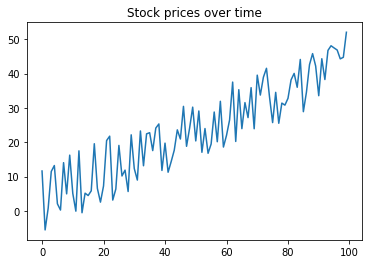

In [ ]:
# Generate some training data

import matplotlib.pyplot as plt
import numpy as np

X = np.arange(100)
delta = np.random.uniform(-10,10, size=(100,))
Y = .4 * X +3 + delta

plt.plot(X, Y)
plt.title('Stock prices over time')

Tensor("Shape:0", shape=(2,), dtype=int32)
Tensor("Shape_1:0", shape=(2,), dtype=int32)
Tensor("Shape_2:0", shape=(2,), dtype=int32)
Tensor("Shape_3:0", shape=(2,), dtype=int32)
3555.7644
3221.084
2910.0337
2622.3853
2357.0107
2112.783
1888.5953
1683.361
1496.0132
1325.5056
1170.8146
1030.9368
904.89545
791.7371
690.5349
600.39
520.4332
449.82626
387.7641
333.4761
286.22787
245.3228
210.10321
179.95161
154.29185
132.5888
114.34919
99.12138
86.49477
76.0988
67.60147
60.707943
55.15869
50.726826
47.216206
44.45857
42.31085
40.65293
39.384556
38.423107
37.701187
37.16434
36.769
36.48079
36.27282
36.124283
36.0193
35.945866
35.89502
35.860153
35.836464
35.82048
35.809757
35.802567
35.797718
35.794403
35.792065
35.79034
35.789005
35.7879
35.786922
35.786022
35.785152
35.784298
35.783443
35.782574
35.781696
35.780796
35.779877
35.778942
35.777985
35.777
35.776005
35.77498
35.773933
35.772865
35.77177
35.770657
35.769516
35.76835
35.76716
35.765945
35.764706
35.76344
35.762146
35.760826
35.75

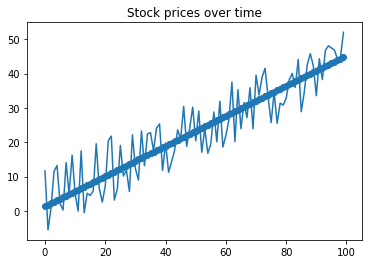

In [ ]:
import tensorflow as tf

# clear all previous values held from previous runnings of the code
tf.reset_default_graph()

# intialize x and y with two things: 1. the type all values within x and y will have 2. the proper shape
# float32 maens floating-point number (a number with decimals) that occupies 32 bits of storage
# note that x and y don't contain any information right now - they're empty and don't have any values inside!
x = tf.placeholder(tf.float32, shape=(1, None))
y = tf.placeholder(tf.float32, shape=(1, None))
print(tf.shape(x))

# initialize W and b with three things: 1. the type all values within them will have 2. the proper shape 3. random values
# it's been proven that it's a good idea to initialize W and b with random values to start off training as opposed to all zeroes
W = tf.Variable(name="weights", dtype=tf.float32, expected_shape=[1, 1], initial_value=np.random.randn(1, 1))
b = tf.Variable(name="biases", dtype=tf.float32, expected_shape=[1, 1], initial_value=np.random.randn(1, 1))

print(tf.shape(W))
print(tf.shape(b))

# we're defining what the y_pred value equals, but note that we're not actually calling it yet!
y_pred = tf.add(tf.matmul(W, x), b)
print(tf.shape(y_pred))

# we're defining mean squared error with a function tensorflow provides us
# y is the actual label value, y_pred is what our model outputted
mse = tf.losses.mean_squared_error(y, y_pred)

# our model will have some amount of error, and it needs a defined way to use this knowledge to determine how exactly W 
# and b's values need to change to make this model more accurate
# we're using a pre-defined method for this called AdamOptimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# in one iteration of training your ml model:
  # predict stock value prices for each of your input rows 
  # get mean squared error -- loss -- : a singular value that represents how off your function was OVERALL on all of the input examples it just tried to predict output
  # values for
  # now update your weights and bias values so that your function sucks less (and hopefully will have a lower mse value next time)

# creating tensorflow session
with tf.Session() as sess:
  # actually running stuff! before, we were setting up various things that COULD have values and COULD be called; this is the start
  # of us actually using them
    sess.run(tf.global_variables_initializer())
    
    # ask yourself: what does 5000 represent?
    
    for i in range(5000):

      # (ans to above question: it's the number of training iterations! aka the number of times we do the iteration 
      # described in the comment block above)

      # here's the SINGLE line we're using to run that entire single iteration process described above
        _, mse_run = sess.run([opt, mse], feed_dict = {x: [X], y: [Y]})
        
        # we'll print out the mean squared error once every 50 iterations so it's not too much info
        if i % 50 == 0:
            print(mse_run)

  # we're now done training! it's time to test
  # we're getting all of our predicted labels for our test input data
    y_pred_run = sess.run(y_pred, feed_dict = {x: [X], y: [Y]})
    # plotting our results
    plt.plot(X, Y)
    plt.title('Stock prices over time')
    plt.scatter(X, y_pred_run)

# **Homework 1**

Using this dataset (https://www.kaggle.com/leonardopena/top50spotify2019), write TensorFlow code to perform linear regression to predict the popularity of a song based on variables of your choosing. Please print out the MSE regularly during training to make sure that it's decreasing (and that gradient descent is not diverging). Finally, plot how the MSE changed during training.

### **Submission Instructions**

If you are using Google Colab:
* Go to "File" -> "Download .ipynb"
* Email the file to uclaacmai@gmail.com with the subject "Last Name, First Name: Linear Regression Assignment" by Monday, January 20th at 11:59 pm. 

Feel free to email us if you have any questions! Looking forward to the next session.

Our lovely interns have written a Python script to prepare the Spotify song data from the CSV file!

Saving top50.csv to top50 (1).csv
                       id  ... time_signature
0   6DCZcSspjsKoFjzjrWoCd  ...            4.0
1   3ee8Jmje8o58CHK66QrVC  ...            4.0
2   0e7ipj03S05BNilyu5bRz  ...            4.0
3   3swc6WTsr7rl9DqQKQA55  ...            4.0
4   2G7V7zsVDxg1yRsu7Ew9R  ...            4.0
..                    ...  ...            ...
95  630sXRhIcfwr2e4RdNtjK  ...            4.0
96  2xmrfQpmS2iJExTlklLoA  ...            4.0
97  5WvAo7DNuPRmk4APhdPzi  ...            5.0
98  1j4kHkkpqZRBwE0A4CN4Y  ...            4.0
99  3EPXxR3ImUwfayaurPi3c  ...            4.0

[100 rows x 16 columns]


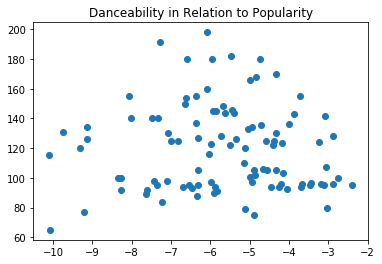

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops

# Importing data through pandas
top50_dataset = pd.read_csv(io.StringIO(uploaded['top50.csv'].decode('ISO-8859-1')))
print(top50_dataset)
# Representing as NumPy
np_top50 = top50_dataset.values

X = np_top50[0:, 6]   # Danceability
Y = np_top50[0:, 13]   # Popularity
plt.scatter(X, Y)
plt.title('Danceability in Relation to Popularity')
plt.show()